In [ ]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
seq = iaa.Sequential([
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(1,
        iaa.GaussianBlur(sigma=(0, 2.0))
    ),
    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),
    iaa.ContrastNormalization((0.75, 1.2)),
    iaa.ContrastNormalization((0.5, 1.0))
], random_order=True) # apply augmenters in random order

In [ ]:
img = np.array(Image.open('/root/data/hackathon/building_massa_dataset/images/test/22828930_15.tiff'))

In [ ]:
# plt.figure(figsize=(15, 15))
f, ax = plt.subplots(10, 1, figsize=(20, 100))
for i in range(10):
    ax[i].imshow(seq.augment_image(img))
plt.show()

In [ ]:
img = '/root/thomas/github/stanfordHacks/example_images/aleppo_2.JPG'

In [ ]:
Image.open(img)

# test the generator

In [1]:
import os
from generator import myGenerator
from generator import flip_axis
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import imgaug as ia
from imgaug import augmenters as iaa

In [2]:
# def myGenerator(file_paths, steps_per_epoch, BATCH_SIZE, INPUT_SHAPE):
#     i = 0
#     seq = iaa.Sequential([iaa.Sometimes(0.7, iaa.GaussianBlur(sigma=(0, 2.0))),
#                       iaa.Sharpen(alpha=(0, 0.1), lightness=(0.7, 1.3)),
#                       iaa.ContrastNormalization((0.5, 1.2))],
#                      random_order=True)
#     while True:
#         x_batch = np.empty((BATCH_SIZE, INPUT_SHAPE[0], INPUT_SHAPE[1], INPUT_SHAPE[2]))
#         y_batch = np.empty((BATCH_SIZE, INPUT_SHAPE[0], INPUT_SHAPE[1], 1))
#         for (ind, j) in enumerate(range(i*BATCH_SIZE, (i+1)*BATCH_SIZE)):
#             # pick a random image
#             f = np.random.choice(file_paths)
#             print(f)
#             random_x = np.random.randint(0, 1500-img_size)
#             random_y = np.random.randint(0, 1500-img_size)
#             xb = np.array(Image.open(f))[random_x:random_x+img_size, random_y:random_y+img_size, :]
#             ftruth = f.replace('images', 'labels')
#             ftruth = ftruth[:-1]
#             yb = np.expand_dims(np.array(Image.open(ftruth))[random_x:random_x+img_size, random_y:random_y+img_size, 0], axis=2)
#             yb[yb==255]=1
#             if np.random.random() < 0.5:
#                 xb = flip_axis(xb, 1)
#                 yb = flip_axis(yb, 1)
#             if np.random.random() < 0.5:
#                 xb = flip_axis(xb, 0)
#                 yb = flip_axis(yb, 0)
#             if np.random.random() < 0.5:
#                 xb = xb.swapaxes(1, 0)
#                 yb = yb.swapaxes(1, 0)
#             x_batch[ind,...] = xb
#             y_batch[ind,...] = yb
#         # bunch of augmentation

#         x_batch = seq.augment_images(x_batch)
#         i += 1
#         if i >= steps_per_epoch:
#             i = 0
#         yield x_batch, y_batch

In [3]:
img_size = 256

In [4]:
train = [os.path.join('/root/data/hackathon/building_massa_dataset/images/train/', f ) for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/train/') if f.endswith('.tiff')]

In [5]:
train_generator = myGenerator(train, 10, 1, (256, 256, 3))

/root/data/hackathon/building_massa_dataset/images/train/23578930_15.tiff


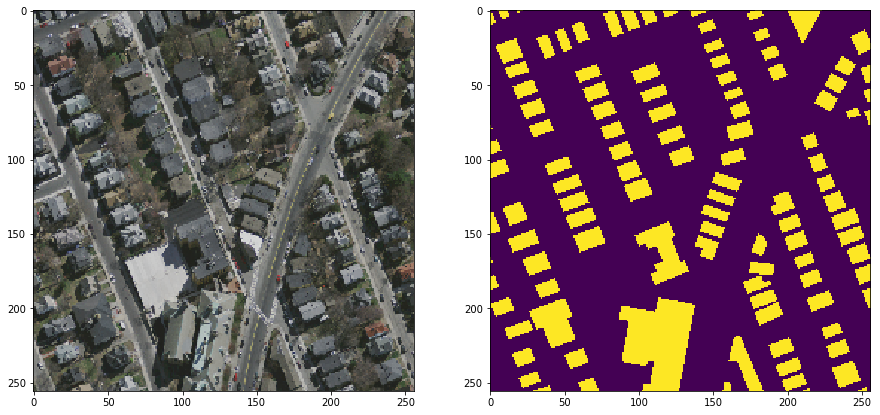

In [11]:
x, y = train_generator.next()
f, ax = plt.subplots(1, 2, figsize= (15, 10))
ax[0].imshow(np.array(x[0,...], dtype=np.uint8))
ax[1].imshow(y[0,...,0])
plt.show()

In [ ]:
# bad 
23279095_15.tiff
23279095_15.tiff